In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from utils import *
main_path = r'D:\Git_project\Jupyter_Projects\Smart_house\data\device_log_join_device_type.csv'

In [10]:
pip install plotly

  Using cached https://files.pythonhosted.org/packages/44/ef/beae4b4ef80902f22e3af073397f079c96969c69b2c7d52a57ea9ae61c9d/retrying-1.3.3.tar.gz
  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=9c42ecf212158a54455b5062343e31e557a036850c113f8da57f371f580025a9
  Stored in directory: C:\Users\Grotter\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [2]:
data = pd.read_csv(main_path, encoding = "cp1251", sep=',',  engine='python')

In [3]:
device_name_dict = data[['device_name','desc']].drop_duplicates().set_index(keys='device_name').to_dict()['desc']
device_name_dict = {i: '{}-{}'.format(i,j) for i,j in zip(list(device_name_dict.keys()),list(device_name_dict.values()))}
device_name_dict

{'HUMSENS1': 'HUMSENS1-Влажность в котельной',
 'TEMPSENS2': 'TEMPSENS2-Температура под крыльцом',
 'TEMPSENS1': 'TEMPSENS1-Температура рядом с котлом',
 'PRESSENS1': 'PRESSENS1-Давление наружного воздуха',
 'GAZDTCT1': 'GAZDTCT1-Газ рядом с котлом',
 'HUMSENS2': 'HUMSENS2-Влажность юго-восточная комната',
 'HUMSENS3': 'HUMSENS3-Влажность юго-западная комната',
 'HUMSENS4': 'HUMSENS4-Влажность северо-восточная комната',
 'HUMSENS5': 'HUMSENS5-Влажность северо-западная комната',
 'MOTSENS1': 'MOTSENS1-Присутствие юго-западная комната',
 'TEMPSENS3': 'TEMPSENS3-Температура юго-восточная комната',
 'TEMPSENS4': 'TEMPSENS4-Температура юго-западная комната',
 'TEMPSENS5': 'TEMPSENS5-Температура северо-восточная комната',
 'TEMPSENS6': 'TEMPSENS6-Температура северо-западная комната',
 'MOTSENS10': 'MOTSENS10-Движение тамбур',
 'HUMSENS10': 'HUMSENS10-Влажность тамбур',
 'HUMSENS11': 'HUMSENS11-Влажность столовая',
 'MOTSENS9': 'MOTSENS9-Движение столовая',
 'TEMPSENS11': 'TEMPSENS11-Температ

In [21]:
data.head(10)


,un,id,device_id,action_id,source_ip,level,value,comment,id.1,device_type_id,...,position,desc,units,arange,brange,crange,ctrl_id,id.2,type,desc.1
0,79778,2018-03-08 14:15:59,3,VLU,213.87.138.251,1,35.40,NaN,3,HSDTH0.1,...,0:10:27,Влажность в котельной,%Rh,NaN,NaN,NaN,1,HSDTH0.1,SNS,Humidity sensor based on AN2302
1,79779,2018-03-08 14:15:59,10,VLU,213.87.138.251,1,-2.85,NaN,10,TSBMP0.1,...,0:83:12,Температура под крыльцом,&deg;C,0.0,NaN,NaN,1,TSBMP0.1,SNS,Датчик температуры на базе BMP180
2,79780,2018-03-08 14:16:06,2,VLU,213.87.138.251,1,15.50,NaN,2,TSDTH0.1,...,0:10:12,Температура рядом с котлом,&deg;C,0.0,8.0,NaN,1,TSDTH0.1,SNS,Temperature sensor based on AN2302
3,79781,2018-03-08 14:16:06,11,VLU,213.87.138.251,1,740.85,NaN,11,PSBMP0.1,...,0:83:27,Давление наружного воздуха,mmHg,NaN,NaN,NaN,1,PSBMP0.1,SNS,Датчик давления базе BMP180
4,79782,2018-03-08 14:16:16,12,VLU,213.87.138.251,1,416.00,0.0,12,GAZFC0.1,...,0:40:12,Газ рядом с котлом,n,NaN,500.0,NaN,1,GAZFC0.1,SNS,Детектор газа на основе FC-22
5,79783,2018-03-08 14:26:24,12,VLU,213.87.138.251,1,400.00,0.0,12,GAZFC0.1,...,0:40:12,Газ рядом с котлом,n,NaN,500.0,NaN,1,GAZFC0.1,SNS,Детектор газа на основе FC-22
6,79784,2018-03-08 14:27:43,10,VLU,213.87.138.251,1,-2.50,NaN,10,TSBMP0.1,...,0:83:12,Температура под крыльцом,&deg;C,0.0,NaN,NaN,1,TSBMP0.1,SNS,Датчик температуры на базе BMP180
7,79785,2018-03-08 14:27:48,15,VLU,213.87.138.251,1,46.80,NaN,15,HSDTH0.1,...,2:50:80,Влажность юго-восточная комната,%Rh,NaN,NaN,NaN,2,HSDTH0.1,SNS,Humidity sensor based on AN2302
8,79786,2018-03-08 14:27:49,16,VLU,213.87.138.251,1,41.80,NaN,16,HSDTH0.1,...,2:30:80,Влажность юго-западная комната,%Rh,NaN,NaN,NaN,2,HSDTH0.1,SNS,Humidity sensor based on AN2302
9,79787,2018-03-08 14:27:49,19,VLU,213.87.138.251,1,40.50,NaN,19,HSDTH0.1,...,2:65:20,Влажность северо-восточная комната,%Rh,NaN,NaN,NaN,2,HSDTH0.1,SNS,Humidity sensor based on AN2302


In [4]:
def heatmap(x, y, size):
    fig, ax = plt.subplots(figsize=(20, 10))
    
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
  

In [5]:
data['id_sp'] = data['id'].apply(lambda x: x.split(' ')[0])
clm = ['un','id','device_name','value']
data_pivot = data[clm].pivot('un','device_name','value')
data_pivot_date = data_pivot.join(data[['un','id','id_sp']].set_index('un'))




In [7]:
data_pivot_date.columns


Index(['GAZDTCT1', 'HUMSENS1', 'HUMSENS10', 'HUMSENS11', 'HUMSENS2',
       'HUMSENS3', 'HUMSENS4', 'HUMSENS5', 'MOTSENS1', 'MOTSENS10', 'MOTSENS9',
       'PRESSENS1', 'SRN1', 'TEMPSENS1', 'TEMPSENS11', 'TEMPSENS12',
       'TEMPSENS2', 'TEMPSENS3', 'TEMPSENS4', 'TEMPSENS5', 'TEMPSENS6', 'id',
       'id_sp'],
      dtype='object')

In [6]:
def sensor_data_mean(clm, data_pivot_date=data_pivot_date):
    data_pivot = data_pivot_date.groupby(clm).mean()
    data_temp = dict()
    for i in data_pivot.columns:
        print(i)
        data_temp[i]= pd.Series(data_pivot[i].dropna().to_list())


    return  pd.DataFrame(data_temp), data_pivot

GAZDTCT1
HUMSENS1
HUMSENS10
HUMSENS11
HUMSENS2
HUMSENS3
HUMSENS4
HUMSENS5
MOTSENS1
MOTSENS10
MOTSENS9
PRESSENS1
SRN1
TEMPSENS1
TEMPSENS11
TEMPSENS12
TEMPSENS2
TEMPSENS3
TEMPSENS4
TEMPSENS5
TEMPSENS6
0      1.000000
1      0.295533
2      0.433565
3      0.011768
4      0.094918
         ...   
436    0.163491
437    0.440598
438    0.916067
439    0.834712
440    1.000000
Name: value, Length: 441, dtype: float64


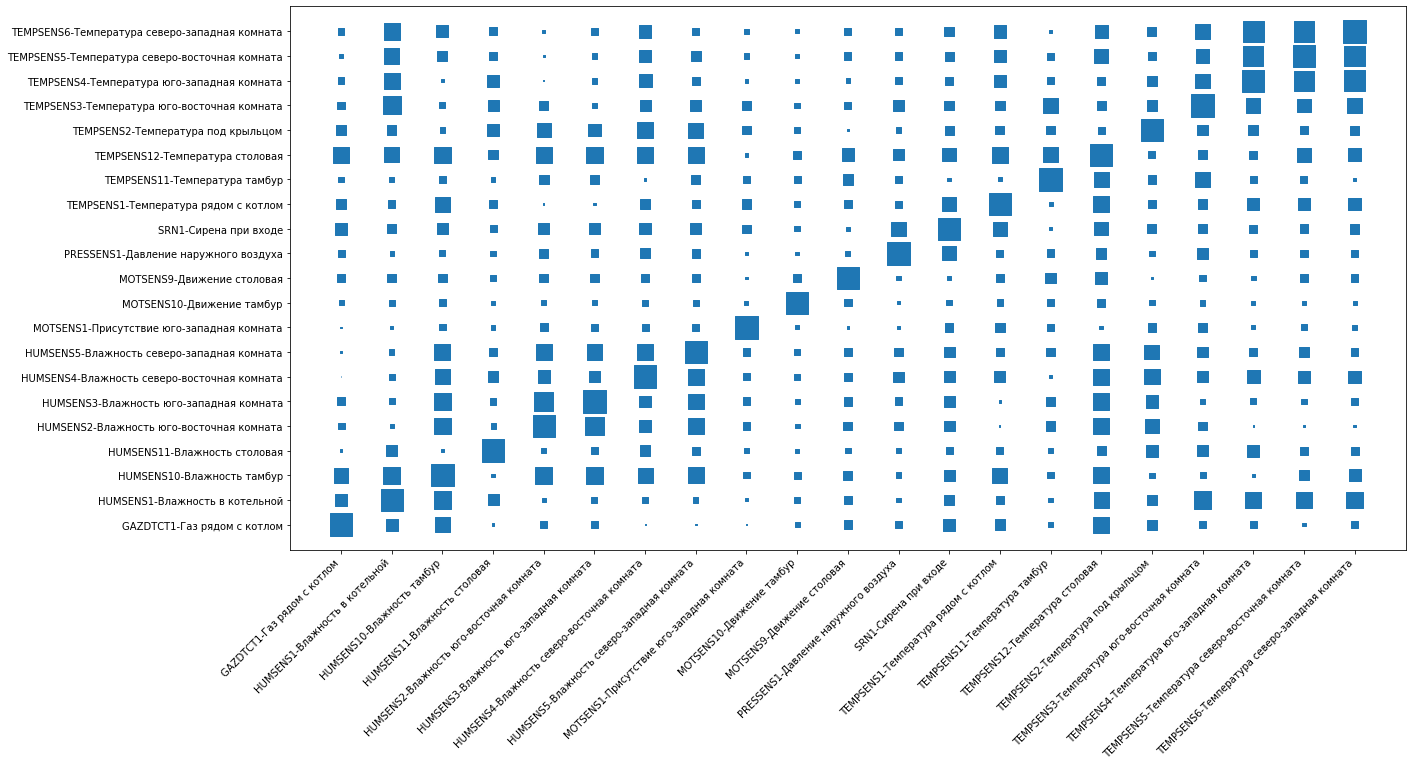

In [7]:
# не усредненные значения
data_corr, data_pivot= sensor_data_mean('id')
corr = data_corr.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
print(corr['value'].abs())
heatmap(
    x=corr['x'].replace(device_name_dict),
    y=corr['y'].replace(device_name_dict),
    size=corr['value'].abs()
)





GAZDTCT1
HUMSENS1
HUMSENS10
HUMSENS11
HUMSENS2
HUMSENS3
HUMSENS4
HUMSENS5
MOTSENS1
MOTSENS10
MOTSENS9
PRESSENS1
SRN1
TEMPSENS1
TEMPSENS11
TEMPSENS12
TEMPSENS2
TEMPSENS3
TEMPSENS4
TEMPSENS5
TEMPSENS6
2      0.581023
10     0.443638
12     0.547097
13     0.492800
15     0.736856
         ...   
433    0.414393
436    0.748502
437    0.987557
438    0.977602
439    0.995109
Name: value, Length: 160, dtype: float64


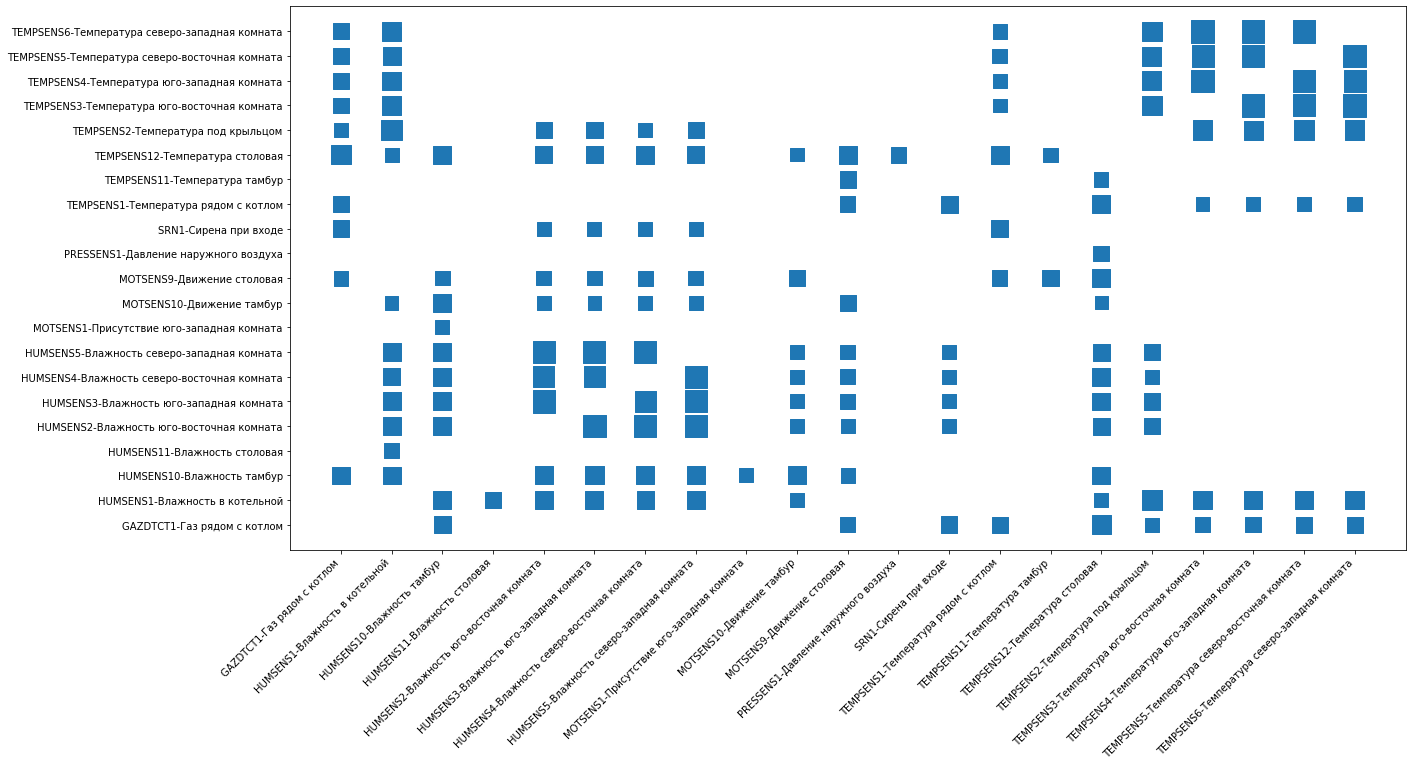

In [8]:
# усредненные значения
data_corr, data_pivot= sensor_data_mean('id_sp')
data_corr = data_corr.fillna(method="bfill")
corr = data_corr.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
corr['value'] =corr['value'].abs()
# фильтруем корреляцию
corr = corr[(corr['value']>0.35) & (corr['value']!=1.0)]
print(corr['value'].abs())
heatmap(
    x=corr['x'].replace(device_name_dict),
    y=corr['y'].replace(device_name_dict),
    size=corr['value'].abs()
)



In [41]:
corr

,x,y,value
2,HUMSENS10,GAZDTCT1,0.581023
10,MOTSENS9,GAZDTCT1,0.443638
12,SRN1,GAZDTCT1,0.547097
13,TEMPSENS1,GAZDTCT1,0.492800
15,TEMPSENS12,GAZDTCT1,0.736856
...,...,...,...
433,TEMPSENS1,TEMPSENS6,0.414393
436,TEMPSENS2,TEMPSENS6,0.748502
437,TEMPSENS3,TEMPSENS6,0.987557
438,TEMPSENS4,TEMPSENS6,0.977602


In [12]:
corr.pivot('y','x')['value']['GAZDTCT1'].to_dict()

{'GAZDTCT1': nan,
 'HUMSENS1': nan,
 'HUMSENS10': 0.581022595263678,
 'HUMSENS11': nan,
 'HUMSENS2': nan,
 'HUMSENS3': nan,
 'HUMSENS4': nan,
 'HUMSENS5': nan,
 'MOTSENS1': nan,
 'MOTSENS10': nan,
 'MOTSENS9': 0.4436375091651419,
 'PRESSENS1': nan,
 'SRN1': 0.5470970764919298,
 'TEMPSENS1': 0.49280031025558596,
 'TEMPSENS11': nan,
 'TEMPSENS12': 0.736855539338642,
 'TEMPSENS2': 0.38494803303655356,
 'TEMPSENS3': 0.47885937430680303,
 'TEMPSENS4': 0.4859527098041833,
 'TEMPSENS5': 0.5325161114663212,
 'TEMPSENS6': 0.5130211413092564}

In [15]:
data_pivot = data_pivot_date.groupby('id').mean()
data_pivot




,GAZDTCT1,HUMSENS1,HUMSENS10,HUMSENS11,HUMSENS2,HUMSENS3,HUMSENS4,HUMSENS5,MOTSENS1,MOTSENS10,...,PRESSENS1,SRN1,TEMPSENS1,TEMPSENS11,TEMPSENS12,TEMPSENS2,TEMPSENS3,TEMPSENS4,TEMPSENS5,TEMPSENS6
id,,,,,,,,,,,,,,,,,,,,,
2018-01-07 16:03:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,15.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07 16:03:36,NaN,60.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07 16:03:47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,738.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-07 16:05:07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.31,NaN,NaN,NaN,NaN
2018-01-07 16:06:45,253.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26 23:57:51,NaN,NaN,NaN,NaN,NaN,NaN,44.9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26 23:58:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,20.5,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-26 23:58:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import plotly.offline as pyo
import plotly.graph_objs as go

data_pivot = data_pivot_date.groupby('id_sp').mean()
# data_pivot = data_pivot.loc['2019' <= data_pivot.index] 
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=1500,
    height=800)
data_temp = []
for i in data_pivot.columns[:]:
    if 'MOT' in i:
        print(i)
        gaz = data_pivot[i].replace().apply(lambda x: x*50).to_dict()
        trace = go.Scatter(x=list(gaz.keys()), y=list(gaz.values()),
                        mode='lines',
                        name=device_name_dict[i])
    else:
        print(i)
        gaz = data_pivot[i].replace().to_dict()
        trace = go.Scatter(x=list(gaz.keys()), y=list(gaz.values()),
                        mode='lines',
                        name=device_name_dict[i])
    data_temp.append(trace)
layout = go.Layout(
    title = 'Sensors in smart house'
)

fig = go.Figure(data=data_temp,layout=layout)
pyo.plot(fig, filename='smart_house_mean_diff.html')

ModuleNotFoundError: No module named 'plotly'

In [ ]:
fig.write_html("plot_mean_2020.html")

In [7]:
data_pivot = data_pivot_date.groupby('id').mean()


In [8]:
data_pivot.columns

Index(['GAZDTCT1', 'HUMSENS1', 'HUMSENS10', 'HUMSENS11', 'HUMSENS2',
       'HUMSENS3', 'HUMSENS4', 'HUMSENS5', 'MOTSENS1', 'MOTSENS10', 'MOTSENS9',
       'PRESSENS1', 'SRN1', 'TEMPSENS1', 'TEMPSENS11', 'TEMPSENS12',
       'TEMPSENS2', 'TEMPSENS3', 'TEMPSENS4', 'TEMPSENS5', 'TEMPSENS6'],
      dtype='object')

In [10]:
import numpy as np
# white noise 
tem = np.random.normal(loc = data_pivot['TEMPSENS6'].mean(), scale=data_pivot['TEMPSENS6'].std(), size = len(data_pivot['TEMPSENS6']))

In [17]:
data_frame = pd.DataFrame()
data_frame['tem'] = tem
data_frame['temp_orig'] = data_pivot['TEMPSENS6']

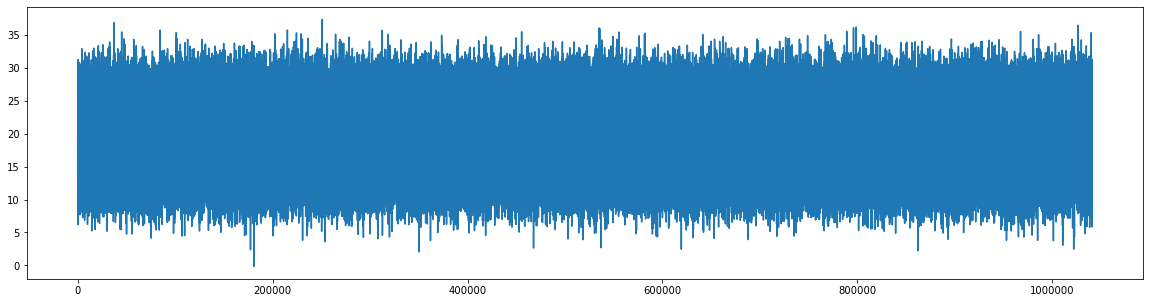

In [24]:
data_frame.tem.plot(figsize = (20, 5))
plt.show()



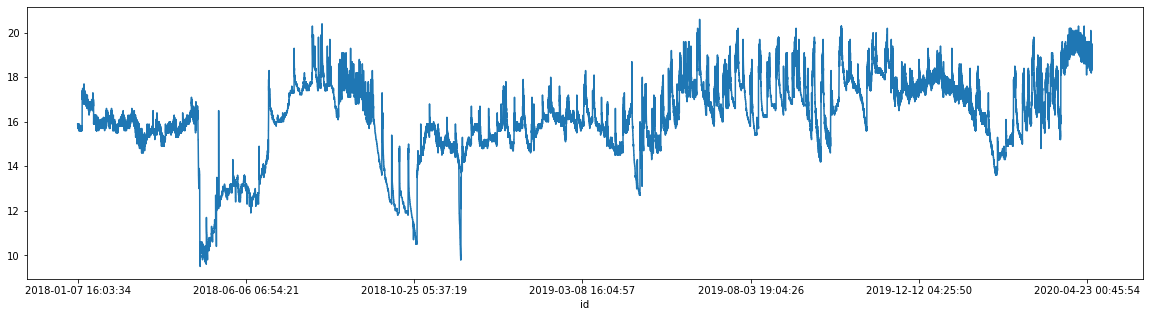

In [25]:
data_pivot['TEMPSENS1'].dropna().plot(figsize = (20, 5))
plt.show()

In [14]:
res = data_pivot.fillna(method="bfill")
# res = data_pivot.fillna(method="ffill")
res.index = pd.to_datetime(res.index)

In [ ]:
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=1500,
    height=800)
data_temp = []
data_pivot = res
for i in data_pivot.columns[:]:
    if 'MOT' in i:
        print(i)
        gaz = data_pivot[i].replace().dropna().apply(lambda x: 0 if x <=0 else 1).to_dict()
        trace = go.Scatter(x=list(gaz.keys()), y=list(gaz.values()),
                        mode='lines',
                        name=device_name_dict[i])
    else:
        print(i)
        gaz = data_pivot[i].replace().dropna().to_dict()
        trace = go.Scatter(x=list(gaz.keys()), y=list(gaz.values()),
                        mode='lines',
                        name=device_name_dict[i])
    data_temp.append(trace)
layout = go.Layout(
    title = 'Sensors in smart house'
)

fig = go.Figure(data=data_temp,layout=layout)
pyo.plot(fig, filename='smart_house_mean.html')


In [15]:
res.TEMPSENS1.plot(figsize = (20, 5))

GAZDTCT1
HUMSENS1
HUMSENS10
HUMSENS11
HUMSENS2
HUMSENS3
HUMSENS4
HUMSENS5
MOTSENS1
MOTSENS10
MOTSENS9
PRESSENS1
SRN1
TEMPSENS1
TEMPSENS11
TEMPSENS12
TEMPSENS2
TEMPSENS3
TEMPSENS4
TEMPSENS5
TEMPSENS6


'smart_house_mean.html'

In [17]:
res.TEMPSENS1.plot(figsize = (20, 5))

NameError: name 'res' is not defined

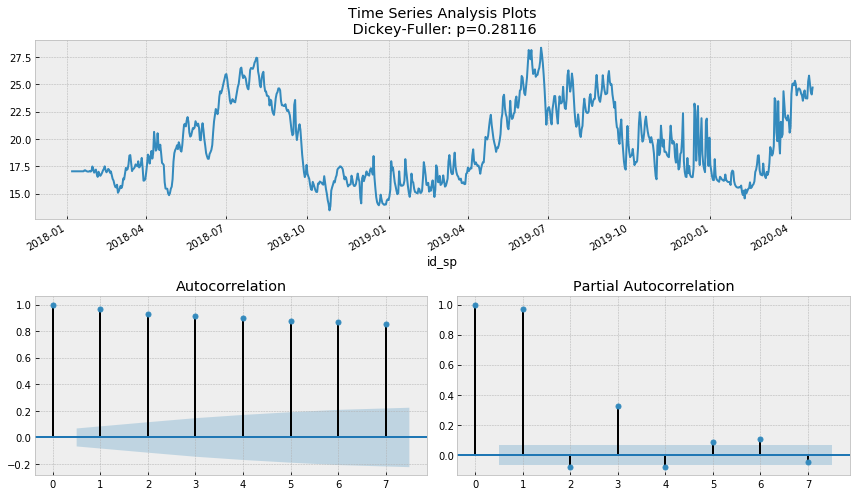

In [22]:
tsplot(res.TEMPSENS3,  lags=7, figsize=(12, 7), style='bmh')
#%